# 基本文字資料的處理(中文)
**Author:** 李畇彤<br>
**Date created:** 2023/03/19<br>
**Last modified:** 2023/03/20<br>

In [1]:
import jieba
import jieba.analyse
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## MetaData

PPT 工作版爬蟲

In [2]:
df = pd.read_csv('data/Tech_Job_OriginalData.csv')
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,各位年薪千萬的大大好，新年快樂。\n小弟是第一次發文的新鮮人\n目前研替面試一個段落\n拿到...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
1,2,https://www.ptt.cc/bbs/Tech_Job/M.1514853292.A...,[新聞]【掙扎片】年薪百萬的科技人 卻因這幾點,2018-01-02 00:28:49,Angels5566,Tech_Job,有網友在mobile01分享，自己在科技業已工作9年，年薪約百萬，但最近老婆還是希望他\n去...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""latin0126"", ...",113.196.174.254,2018-04-27 12:51:21,ptt
2,3,https://www.ptt.cc/bbs/Tech_Job/M.1515382875.A...,[徵才]高雄昇雷科技股份有限公司誠徵工程師,2018-01-08 03:35:11,qqgreenmoon,Tech_Job,【公司名稱】\n昇雷科技股份有限公司\n\n【工作職缺】\n1、硬體工程師\n2、系統工程師...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ohmypig"", ""c...",1.173.60.158,2018-04-27 12:51:21,ptt
3,4,https://www.ptt.cc/bbs/Tech_Job/M.1515470624.A...,[新聞]台工程師全東南亞最便宜好用月薪10萬難,2018-01-09 03:57:41,wahaha23,Tech_Job,台工程師全東南亞最便宜好用 月薪10萬難招人台資企業曝原因\nhttps://goo.gl/...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""pgsa"", ""cmtC...",223.140.35.196,2018-04-27 12:51:21,ptt
4,5,https://www.ptt.cc/bbs/Tech_Job/M.1515484201.A...,[請益]合勤科技面試,2018-01-09 07:43:58,leontsai27,Tech_Job,各位版上的大大好\n\n小弟最近收到合勤科技的面試邀約，因為對該公司不是很了解，想請教下大家...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sintyy"", ""cm...",1.173.175.36,2018-04-27 12:51:21,ptt
...,...,...,...,...,...,...,...,...,...,...,...
1683,1684,https://www.ptt.cc/bbs/Tech_Job/M.1672102664.A...,[新聞]凜冬將至！ 科技大咖掀裁員潮,2022-12-27 08:57:40,jeff0025,Tech_Job,凜冬將至！ 科技大咖掀裁員潮\n\n\n「如果手上有現金，2023年是最好的投資時機，因為股...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""moonth66"", ""...",61.218.53.138,2022-12-28 02:08:06,ptt
1684,1685,https://www.ptt.cc/bbs/Tech_Job/M.1672146819.A...,[新聞]小米裁員5000人爆砍單潮台廠4大咖恐遭,2022-12-27 21:13:36,wahaha23,Tech_Job,小米裁員5000人爆砍單潮 台廠4大咖恐遭重擊\nhttps://www.chinatime...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""lookinto"", ""...",1.200.246.105,2022-12-28 02:08:08,ptt
1685,1686,https://www.ptt.cc/bbs/Tech_Job/M.1672167246.A...,Re:[討論]GGCP值不高的把,2022-12-28 02:54:04,xa56,Tech_Job,好文推推\n說實話裡面老將都有腦子\n看你沒怎麼要學也不會一直教啊\n大概就是你努力問他就教...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Interpoint"",...",42.77.180.240,2022-12-29 02:11:56,ptt
1686,1687,https://www.ptt.cc/bbs/Tech_Job/M.1672305717.A...,[新聞]全國最缺這種工程師求供比高達5.7薪水,2022-12-29 17:21:55,peterlin495,Tech_Job,全國最缺這種工程師 求供比高達5.7 薪水超好談\n\n2022-12-29 10:09 聯...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""phantasystar...",42.74.160.18,2022-12-30 02:12:34,ptt


## 1. 初步清理

清除空值

In [3]:
clear_df = df.copy()

#去除有包含空值的筆數
clear_df.dropna(axis=0, how='any')

#用'。'取代'\n\n'，並移除'\n'
clear_df = clear_df.replace(r'\\n\\n', '。', regex=True).replace(r'\n', '', regex=True)

#移除內文中的網址
clear_df['artContent'] = clear_df['artContent'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,各位年薪千萬的大大好，新年快樂。小弟是第一次發文的新鮮人目前研替面試一個段落拿到以下幾家豬屎...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
1,2,https://www.ptt.cc/bbs/Tech_Job/M.1514853292.A...,[新聞]【掙扎片】年薪百萬的科技人 卻因這幾點,2018-01-02 00:28:49,Angels5566,Tech_Job,有網友在mobile01分享，自己在科技業已工作9年，年薪約百萬，但最近老婆還是希望他去考公...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""latin0126"", ...",113.196.174.254,2018-04-27 12:51:21,ptt
2,3,https://www.ptt.cc/bbs/Tech_Job/M.1515382875.A...,[徵才]高雄昇雷科技股份有限公司誠徵工程師,2018-01-08 03:35:11,qqgreenmoon,Tech_Job,【公司名稱】昇雷科技股份有限公司【工作職缺】1、硬體工程師2、系統工程師3、天線工程師4、軟...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ohmypig"", ""c...",1.173.60.158,2018-04-27 12:51:21,ptt
3,4,https://www.ptt.cc/bbs/Tech_Job/M.1515470624.A...,[新聞]台工程師全東南亞最便宜好用月薪10萬難,2018-01-09 03:57:41,wahaha23,Tech_Job,台工程師全東南亞最便宜好用 月薪10萬難招人台資企業曝原因,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""pgsa"", ""cmtC...",223.140.35.196,2018-04-27 12:51:21,ptt
4,5,https://www.ptt.cc/bbs/Tech_Job/M.1515484201.A...,[請益]合勤科技面試,2018-01-09 07:43:58,leontsai27,Tech_Job,各位版上的大大好小弟最近收到合勤科技的面試邀約，因為對該公司不是很了解，想請教下大家的意見像...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sintyy"", ""cm...",1.173.175.36,2018-04-27 12:51:21,ptt
...,...,...,...,...,...,...,...,...,...,...,...
1683,1684,https://www.ptt.cc/bbs/Tech_Job/M.1672102664.A...,[新聞]凜冬將至！ 科技大咖掀裁員潮,2022-12-27 08:57:40,jeff0025,Tech_Job,凜冬將至！ 科技大咖掀裁員潮「如果手上有現金，2023年是最好的投資時機，因為股市通常領先半...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""moonth66"", ""...",61.218.53.138,2022-12-28 02:08:06,ptt
1684,1685,https://www.ptt.cc/bbs/Tech_Job/M.1672146819.A...,[新聞]小米裁員5000人爆砍單潮台廠4大咖恐遭,2022-12-27 21:13:36,wahaha23,Tech_Job,小米裁員5000人爆砍單潮 台廠4大咖恐遭重擊 邱怡萱中國手機大廠小米近期傳出啟動一波大規模...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""lookinto"", ""...",1.200.246.105,2022-12-28 02:08:08,ptt
1685,1686,https://www.ptt.cc/bbs/Tech_Job/M.1672167246.A...,Re:[討論]GGCP值不高的把,2022-12-28 02:54:04,xa56,Tech_Job,好文推推說實話裡面老將都有腦子看你沒怎麼要學也不會一直教啊大概就是你努力問他就教你不努力他隨...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Interpoint"",...",42.77.180.240,2022-12-29 02:11:56,ptt
1686,1687,https://www.ptt.cc/bbs/Tech_Job/M.1672305717.A...,[新聞]全國最缺這種工程師求供比高達5.7薪水,2022-12-29 17:21:55,peterlin495,Tech_Job,全國最缺這種工程師 求供比高達5.7 薪水超好談2022-12-29 10:09 聯合報 記...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""phantasystar...",42.74.160.18,2022-12-30 02:12:34,ptt


## 2. 斷句

In [4]:
clear_df['artContent'] = clear_df['artContent'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('artContent').reset_index(drop=True)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,各位年薪千萬的大大好,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,新年快樂,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,小弟是第一次發文的新鮮人目前研替面試一個段落拿到以下幾家豬屎屋的offer想請各位提供意見以...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
3,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,確定前往另發正式聘書4.瑞鼎科技 Raydium職缺：類比ic工程師（車用）職等：未知職稱：...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
4,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,若無法再租屋尚未有offer,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
...,...,...,...,...,...,...,...,...,...,...,...
64928,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,列出6%績效偏低員工,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt
64929,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,大約有10,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt
64930,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,000人之譜,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,若依據之前的績效考核系統,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt


## 3. 斷詞

初始化斷詞引擎

In [5]:
jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/user_dict.txt')

Building prefix dict from d:\Programs\Python\NSYSU\dict\dict.txt ...
Dumping model to file cache C:\Users\s2568\AppData\Local\Temp\jieba.u932fa7f4a35dd272e85dfab7bcdf5321.cache
Loading model cost 0.545 seconds.
Prefix dict has been built successfully.


先清除標點符號及空字串

In [6]:
sent_df['artContent'] = sent_df['artContent'].str.replace(r'[^\w\s\d]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,各位年薪千萬的大大好,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,新年快樂,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,小弟是第一次發文的新鮮人目前研替面試一個段落拿到以下幾家豬屎屋的offer想請各位提供意見以...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
3,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,確定前往另發正式聘書4瑞鼎科技 Raydium職缺類比ic工程師車用職等未知職稱未知薪資NN...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
4,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,若無法再租屋尚未有offer,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
...,...,...,...,...,...,...,...,...,...,...,...
64928,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,列出6績效偏低員工,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt
64929,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,大約有10,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt
64930,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,000人之譜,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,若依據之前的績效考核系統,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt


進行jieba斷詞

In [7]:
word_df = sent_df.assign(word = sent_df['artContent'].apply(jieba.lcut)).explode('word').drop(['artContent'], axis=1)

word_df = word_df.loc[word_df['word'].str.len()>1]

word_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,各位
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,千萬
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,大大
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,列出


## 4. 移除停用字

移除dataframe中的停用字

In [8]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,快樂
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,小弟
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,發文
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,列出


## 5. 計算詞頻

In [9]:
freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df

,word,freq
0,公司,4902
1,工作,3702
2,面試,3598
3,主管,1963
4,員工,1683
...,...,...
41309,因台,1
41310,因可,1
41311,因受僱,1
41312,因傲勝,1


## 6. 資料結果視覺化

設定圖像中文顯示

In [10]:
import matplotlib
print(matplotlib.matplotlib_fname())
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

c:\Users\s2568\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\mpl-data\matplotlibrc


詞頻前10高的長條圖

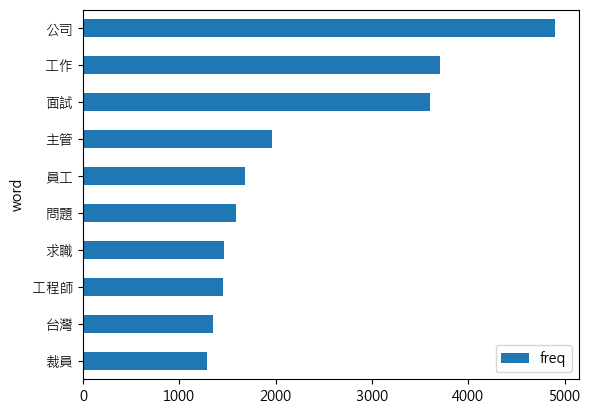

In [11]:
freq_df.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

## 7. 更新停用字字典

In [12]:
# 參數形式手動加入停用字
stopwords_manual = ['內容','表示','主要','小弟','最近','發現','相關','目前', '公司', '工作', '主管', '員工', '工程師']
stopwords.extend(stopwords_manual)
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,快樂
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,發文
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新鮮人
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,績效
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人


### 7.1 重新計算詞頻

In [13]:
freq_df_2 = pd.DataFrame({'freq':noStop_df_2.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']  
freq_df_2 = freq_df_2[clist]
freq_df_2

,word,freq
0,面試,3598
1,問題,1589
2,求職,1465
3,台灣,1347
4,裁員,1290
...,...,...
41296,因受僱,1
41297,因傲勝,1
41298,因以,1
41299,因什麼,1


### 7.2 重新繪製長條圖

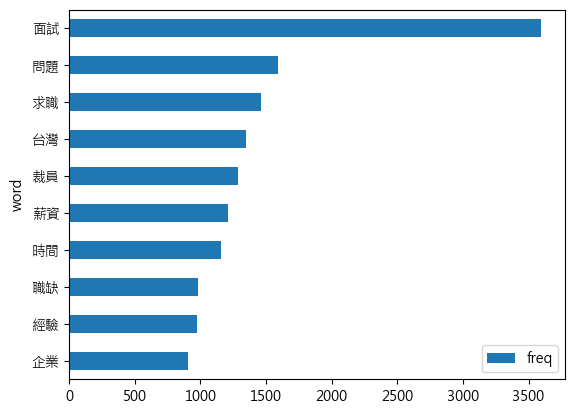

In [14]:
freq_df_2.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

## 8. 更新斷詞字典

參數形式手動加入字詞

In [15]:
jieba.add_word('年終')
jieba.add_word('福利')
jieba.add_word('系統廠')
jieba.add_word('IC設計')
jieba.add_word('晶片')
jieba.add_word('問題')

### 8.1 重新斷詞

In [16]:
# sent_df是還沒斷詞過的df
word_df_2 = sent_df.assign(word = sent_df['artContent'].apply(jieba.lcut)).explode('word').drop(['artContent'], axis=1)

#把長度小於1的row刪掉
word_df_2 = word_df_2.loc[word_df_2['word'].str.len()>1]
word_df_2

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,各位
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,千萬
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,大大
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,列出


### 8.2 重新移除停用字

In [17]:
noStop_df_3 = word_df_2[~word_df_2['word'].isin(stopwords)]
noStop_df_3

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,快樂
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,發文
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新鮮人
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,績效
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人


### 8.3 重新計算詞頻

In [18]:
freq_df_3 = pd.DataFrame({'freq':noStop_df_3.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df_3 = freq_df_3[clist]
freq_df_3

,word,freq
0,面試,3598
1,問題,1589
2,求職,1465
3,台灣,1347
4,裁員,1290
...,...,...
41299,因可,1
41300,因受僱,1
41301,因傲勝,1
41302,因以,1


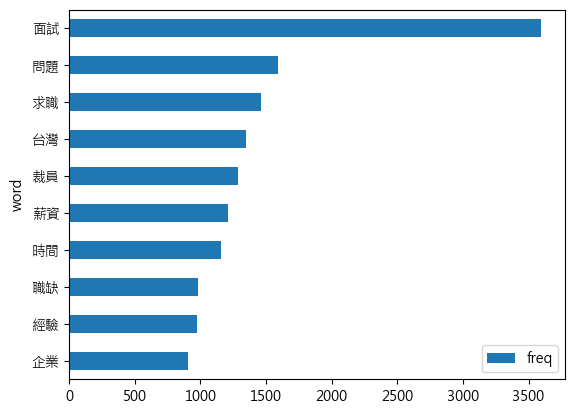

In [19]:
freq_df_3.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

## 9. 繪製文字雲

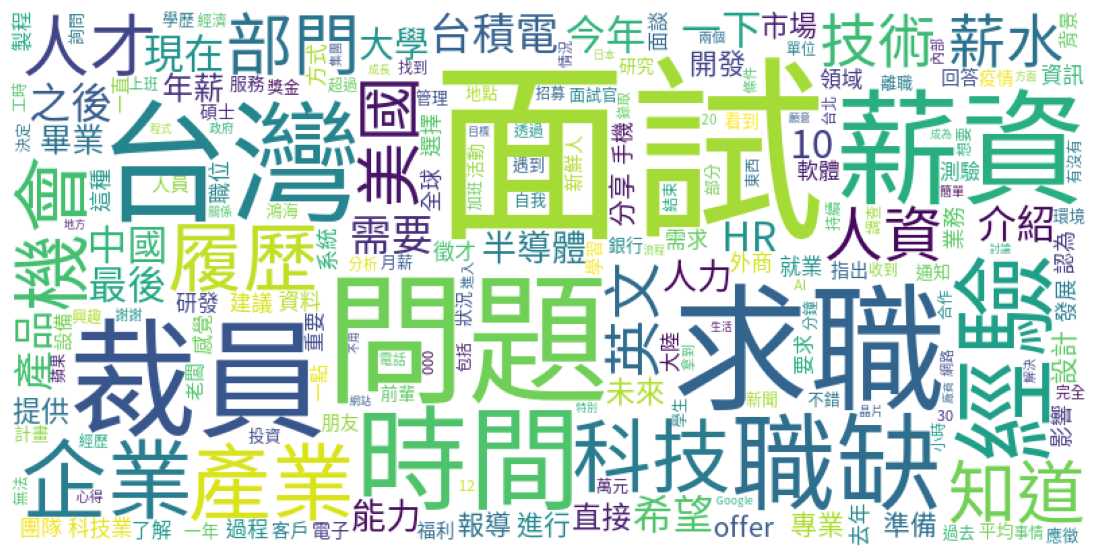

In [20]:
# 詞頻變成dict
freq_dict = freq_df_3.set_index('word', inplace=False).to_dict()
freq_dict = freq_dict['freq']

# 繪製文字雲
FontPath = 'data/SourceHanSansTW-Regular.otf' # 設定字型
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=FontPath, max_words=200)
wordcloud.generate_from_frequencies(freq_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

儲存 clean data

In [21]:
#noStop_df_3.to_csv("data/clean_zh_data.csv", encoding = 'utf-8',index = False)